### Data Exploration of TLC Trip Record Data

**Name: Darren Foley**

**Date: 2021-10-21**

In [2]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.7MB 5.9MB/s ta 0:00:011    94% |██████████████████████████████▎ | 1.6MB 27.9MB/s eta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [3]:
!pip install geopandas

     |████████████████████████████████| 994 kB 3.9 MB/s            
     |████████████████████████████████| 9.5 MB 30.4 MB/s            
     |████████████████████████████████| 6.5 MB 28.8 MB/s            
     |████████████████████████████████| 15.4 MB 30.9 MB/s            
     |████████████████████████████████| 247 kB 31.3 MB/s            
     |████████████████████████████████| 14.8 MB 26.4 MB/s            
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateutil-2.6.1:
      Successfully uninstalled python-dateutil-2.6.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Attempting uninstall: pandas
    Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3
ERROR: pip's dependency resolver does not currently take into account all the packages that

In [1]:
import pandas as pd
import configparser
import geopandas as gpd
import os
import sys
import pprint

### File 1: data/yellow_tripdata_2020-12.csv

In [27]:
yellow_taxi_trips = "data/yellow_tripdata_2020-12.csv"

In [5]:
!cat data/yellow_tripdata_2020-12.csv | head -n10

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1,2020-12-01 00:07:13,2020-12-01 00:18:12,1,7.60,1,N,138,263,1,21.5,3,0.5,2.5,6.12,0.3,33.92,2.5
1,2020-12-01 00:41:19,2020-12-01 00:49:45,1,1.60,1,N,140,263,1,8,3,0.5,2.95,0,0.3,14.75,2.5
2,2020-12-01 00:33:40,2020-12-01 01:00:35,1,16.74,2,N,132,164,1,52,0,0.5,2.5,6.12,0.3,63.92,2.5
2,2020-12-01 00:02:15,2020-12-01 00:13:09,1,4.16,1,N,238,48,1,14,0.5,0.5,1,0,0.3,18.8,2.5
2,2020-12-01 00:37:42,2020-12-01 00:45:11,1,2.22,1,N,238,41,2,8.5,0.5,0.5,0,0,0.3,9.8,0
1,2020-12-01 00:27:47,2020-12-01 00:45:40,0,8.40,1,N,138,137,1,25,3,0.5,6,6.12,0.3,40.92,2.5
2,2020-12-01 00:40:47,2020-12-01 00:57:03,1,6.44,1,N,132,191,1,19.5,0.5,0.5,4.16,0,0.3,24.96,0
2,2020-12-01 00:01:42,2020-12-01 00:06:06,1,.99,1,N,234,137,1,5.5,0.5,0.5,1.86,0,0.3,11.16,2

In [28]:
# 18 columns
headers = ["VendorID","tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","RatecodeID","store_and_fwd_flag","PULocationID",
           "DOLocationID","payment_type","fare_amount","extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount","congestion_surcharge"]

"""
1, int
2020-12-01 00:07:13, str
2020-12-01 00:18:12, str
1, int
7.60, float
1, str (mixed types)
N, str
138, int
263, int
1, int
21.5, float
3, int 
0.5, float
2.5, float
6.12, float
0.3, float
33.92, float
2.5 float
"""
dtypes = {"c1": "int", 
          "c2": "str",
          "c3": "str",
          "c4": "float", 
          "c5": "float",
          "c6": "float",
          "c7": "str",
          "c8":"str",
          "c9":"str",
          "c10":"str",
          "c11":"float",
          "c12":"float",
          "c13":"float",
          "c14":"float",
          "c15":"float",
          "c16":"float",
          "c17":"float",
          "c18":"float"}

df_yellow = pd.read_csv(yellow_taxi_trips, sep=",", header=None, names=headers, dtype=dtypes, skiprows=1)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
df_yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-12-01 00:07:13,2020-12-01 00:18:12,1.0,7.60,1.0,N,138,263,1.0,21.5,3.0,0.5,2.50,6.12,0.3,33.92,2.5
1,1.0,2020-12-01 00:41:19,2020-12-01 00:49:45,1.0,1.60,1.0,N,140,263,1.0,8.0,3.0,0.5,2.95,0.00,0.3,14.75,2.5
2,2.0,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,132,164,1.0,52.0,0.0,0.5,2.50,6.12,0.3,63.92,2.5
3,2.0,2020-12-01 00:02:15,2020-12-01 00:13:09,1.0,4.16,1.0,N,238,48,1.0,14.0,0.5,0.5,1.00,0.00,0.3,18.80,2.5
4,2.0,2020-12-01 00:37:42,2020-12-01 00:45:11,1.0,2.22,1.0,N,238,41,2.0,8.5,0.5,0.5,0.00,0.00,0.3,9.80,0.0


In [22]:
df_yellow["RatecodeID"].describe()

count    1.362441e+06
mean     1.028915e+00
std      5.479181e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

In [ ]:
# Check for null values, What should we replace them with?

### File 2: Green Taxi Trips - data/green_tripdata_2020-12.csv

In [2]:
green_taxi_trips = "data/green_tripdata_2020-12.csv"

In [3]:
!cat data/green_tripdata_2020-12.csv | head -n10

VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2,2020-12-01 00:29:37,2020-12-01 00:32:51,N,1,75,75,1,.59,4.5,0.5,0.5,1.16,0,,0.3,6.96,1,1,0
2,2020-12-01 00:41:46,2020-12-01 00:46:31,N,1,75,74,1,1.24,6,0.5,0.5,1.46,0,,0.3,8.76,1,1,0
2,2020-12-01 00:05:46,2020-12-01 00:10:48,N,1,244,243,2,1.19,6,0.5,0.5,1.46,0,,0.3,8.76,1,1,0
2,2020-11-30 23:59:17,2020-12-01 00:16:06,N,1,75,68,1,5.08,17,0.5,0.5,2,0,,0.3,23.05,1,1,2.75
2,2020-12-01 00:57:03,2020-12-01 01:00:29,N,1,74,263,1,1.24,5.5,0.5,0.5,0,0,,0.3,9.55,2,1,2.75
2,2020-12-01 00:05:38,2020-12-01 00:20:26,N,1,244,74,1,2.81,12.5,0.5,0.5,0,0,,0.3,13.8,2,1,0
2,2020-12-01 00:21:19,2020-12-01 00:26:48,N,1,69,116,1,1.12,6,0.5,0.5,0,0,,0.3,7.3,2,1,0
2,2020-12-01 00:33:46,2020-12-01 00:44:01,N,1,116,247,1,2.27,9.5,0.5,0.5,

In [4]:
# 20 columns
headers = ["VendorID","lpep_pickup_datetime","lpep_dropoff_datetime","store_and_fwd_flag","RatecodeID","PULocationID","DOLocationID","passenger_count",
           "trip_distance","fare_amount","extra","mta_tax","tip_amount","tolls_amount","ehail_fee","improvement_surcharge","total_amount","payment_type",
           "trip_type","congestion_surcharge"]

"""
2,
2020-12-01 00:29:37,
2020-12-01 00:32:51,
N,
1,
75,
75,
1,
.59,
4.5,
0.5,
0.5,
1.16,
0,
,
0.3,
6.96,
1,
1,
0
"""
dtypes = {"c1": "int", 
          "c2": "str",
          "c3": "str",
          "c4": "float", 
          "c5": "float",
          "c6": "float",
          "c7": "str",
          "c8":"str",
          "c9":"str",
          "c10":"str",
          "c11":"float",
          "c12":"float",
          "c13":"float",
          "c14":"float",
          "c15":"float",
          "c16":"float",
          "c17":"float",
          "c18":"float",
          "c19": "float",
          "c20": "float"}

df_green = pd.read_csv(green_taxi_trips, sep=",", header=None, names=headers, dtype=dtypes, skiprows=1)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_green.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2020-12-01 00:29:37,2020-12-01 00:32:51,N,1.0,75,75,1.0,0.59,4.5,0.5,0.5,1.16,0.0,NaN,0.3,6.96,1.0,1.0,0.00
1,2.0,2020-12-01 00:41:46,2020-12-01 00:46:31,N,1.0,75,74,1.0,1.24,6.0,0.5,0.5,1.46,0.0,NaN,0.3,8.76,1.0,1.0,0.00
2,2.0,2020-12-01 00:05:46,2020-12-01 00:10:48,N,1.0,244,243,2.0,1.19,6.0,0.5,0.5,1.46,0.0,NaN,0.3,8.76,1.0,1.0,0.00
3,2.0,2020-11-30 23:59:17,2020-12-01 00:16:06,N,1.0,75,68,1.0,5.08,17.0,0.5,0.5,2.00,0.0,NaN,0.3,23.05,1.0,1.0,2.75
4,2.0,2020-12-01 00:57:03,2020-12-01 01:00:29,N,1.0,74,263,1.0,1.24,5.5,0.5,0.5,0.00,0.0,NaN,0.3,9.55,2.0,1.0,2.75


### File 3: For hire vehicles - data/fhv_tripdata_2020-12.csv

In [9]:
for_hire_vehicle_trips = "data/fhv_tripdata_2020-12.csv"

In [6]:
!cat data/fhv_tripdata_2020-12.csv | head -n10

dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Affiliated_base_number
B00009,2020-12-01 00:59:00,2020-12-01 01:19:00,,,,B00009
B00021         ,2020-12-01 00:31:27,2020-12-01 00:39:21,56,173,,B00021         
B00021         ,2020-12-01 00:38:01,2020-12-01 00:45:13,82,129,,B00021         
B00021         ,2020-12-01 00:13:55,2020-12-01 00:24:01,56,56,,B00021         
B00021         ,2020-12-01 00:46:03,2020-12-01 00:54:44,173,173,,B00021         
B00037,2020-12-01 00:14:08,2020-12-01 00:19:34,,177,,B00037
B00037,2020-12-01 00:38:02,2020-12-01 00:46:05,,188,,B00037
B00037,2020-12-01 00:12:41,2020-12-01 00:16:58,,188,,B00037
B00037,2020-12-01 00:51:39,2020-12-01 01:09:50,,39,,B00037
cat: write error: Broken pipe


In [12]:

header=["dispatching_base_num",
        "pickup_datetime",
        "dropoff_datetime", 
        "PULocationID",
        "DOLocationID",
        "SR_Flag",
        "Affiliated_base_number"]

dtypes = {
    "c1": "str",
    "c2": "str",
    "c3": "str",
    "c4": "str",
    "c5": "str",
    "c6": "str",
    "c7": "str"
}



df_fhv = pd.read_csv(for_hire_vehicle_trips, header=None, sep=",", dtype=dtypes, names=header, skiprows=1)

In [13]:
df_fhv.head()

,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Affiliated_base_number
0,B00009,2020-12-01 00:59:00,2020-12-01 01:19:00,NaN,NaN,NaN,B00009
1,B00021,2020-12-01 00:31:27,2020-12-01 00:39:21,56.0,173.0,NaN,B00021
2,B00021,2020-12-01 00:38:01,2020-12-01 00:45:13,82.0,129.0,NaN,B00021
3,B00021,2020-12-01 00:13:55,2020-12-01 00:24:01,56.0,56.0,NaN,B00021
4,B00021,2020-12-01 00:46:03,2020-12-01 00:54:44,173.0,173.0,NaN,B00021


In [ ]:
# Any trip that has a Null pickup or dropoff - exclude
# Replace Nan with 0 for SR_Flag
# Replace dispatching_base_num and Affiliated_base_number with surregete id - Dimension will be created

### File 4: High volume FHV - data/fhvhv_tripdata_2020-12.csv

In [11]:
for_hire_vehicle_trips_high_volume = "data/fhvhv_tripdata_2020-12.csv"

In [14]:
!cat data/fhvhv_tripdata_2020-12.csv | head -n10

hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
HV0003,B02764,2020-12-01 00:13:22,2020-12-01 00:33:53,94,75,
HV0003,B02764,2020-12-01 00:47:19,2020-12-01 00:57:01,75,164,
HV0005,B02510,2020-12-01 00:17:14,2020-12-01 00:37:42,87,179,
HV0003,B02883,2020-12-01 00:01:16,2020-12-01 00:20:26,80,92,
HV0003,B02883,2020-12-01 00:32:03,2020-12-01 00:45:18,92,92,
HV0005,B02510,2020-12-01 00:45:02,2020-12-01 01:06:08,78,41,
HV0003,B02764,2020-12-01 00:28:22,2020-12-01 00:39:40,208,78,
HV0003,B02617,2020-12-01 00:16:07,2020-12-01 00:21:12,203,219,
HV0003,B02617,2020-12-01 00:37:16,2020-12-01 00:46:09,205,139,
cat: write error: Broken pipe


In [12]:

header=["hvfhs_license_num",
        "dispatching_base_num", 
        "pickup_datetime",
        "dropoff_datetime",
        "PULocationID",
        "DOLocationID",
        "SR_Flag"]

dtypes = {
    "c1": "str",
    "c2": "str",
    "c3": "str",
    "c4": "str",
    "c5": "str",
    "c6": "str",
    "c7": "str"
}


df_hvfhv = pd.read_csv(for_hire_vehicle_trips_high_volume, header=None, sep=",", dtype=dtypes, names=header, skiprows=1)

In [13]:
df_hvfhv.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,HV0003,B02764,2020-12-01 00:13:22,2020-12-01 00:33:53,94,75,NaN
1,HV0003,B02764,2020-12-01 00:47:19,2020-12-01 00:57:01,75,164,NaN
2,HV0005,B02510,2020-12-01 00:17:14,2020-12-01 00:37:42,87,179,NaN
3,HV0003,B02883,2020-12-01 00:01:16,2020-12-01 00:20:26,80,92,NaN
4,HV0003,B02883,2020-12-01 00:32:03,2020-12-01 00:45:18,92,92,NaN


### File 5 - Read shapefile into python - data/taxi_zones.shp

In [2]:
taxi_zone = "data/taxi_zones.shp"

In [3]:
df_geo = gpd.read_file(taxi_zone)
#df_geo = df_geo.to_crs(epsg=4326)
#df_geo = df_geo.to_crs()

In [4]:
# Convert to ETRS Lambert Azimuthal projection
df_geo = df_geo.to_crs(epsg=3035)

In [5]:
df_geo.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-1134428.384 5669231.859, -1134419.4..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-1131185.127 5636659.573, -113..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-1108957.611 5652186.105, -1108976.1..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-1126272.246 5653754.349, -1126273.3..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-1147214.236 5660728.016, -1147226.1..."


In [6]:
df_geo.plot()

In [7]:
#df_geo["x"] = df_geo.geometry.centroid.x
#df_geo["y"] = df_geo.geometry.centroid.y

df_geo = df_geo.to_crs(epsg=4326)
#df_geo["y"] = df_geo.geometry.centroid

In [8]:
df_geo.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [9]:
#df_geo["x"] = df_geo["x"].apply(lambda x: '%.5f' % x)
#df_geo["y"] = df_geo["y"].apply(lambda x: '%.5f' % x)
df_geo["y"] = df_geo.geometry.centroid.x
df_geo["x"] = df_geo.geometry.centroid.y

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


In [10]:
df_geo.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,y,x
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",-74.174000,40.691831
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",-73.831299,40.616745
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",-73.847422,40.864474
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",-73.976968,40.723752
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",-74.188484,40.552659


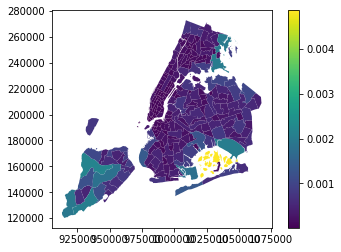

In [22]:
import matplotlib.pyplot as plt
df_geo.plot("Shape_Area", legend=True)
plt.savefig("images/NYC_Zones.jpg")

In [ ]:
# Plot a single point
df={'Type':["PickUp", "DropOff"],
   'latitude':[],
   'longitude':[]
   }

point_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

### Join hvfhv with the shape file geo pandas data

### How fairs are calculated

1. Booking fee 

2. minimum fair

3. rate based on distance and time (0.25 X time) plus (0.96 X miles)

In [14]:
df_hvfhv_top_ten = df_hvfhv.head()

In [15]:
df_hvfhv_top_ten

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,HV0003,B02764,2020-12-01 00:13:22,2020-12-01 00:33:53,94,75,NaN
1,HV0003,B02764,2020-12-01 00:47:19,2020-12-01 00:57:01,75,164,NaN
2,HV0005,B02510,2020-12-01 00:17:14,2020-12-01 00:37:42,87,179,NaN
3,HV0003,B02883,2020-12-01 00:01:16,2020-12-01 00:20:26,80,92,NaN
4,HV0003,B02883,2020-12-01 00:32:03,2020-12-01 00:45:18,92,92,NaN


In [20]:
df_geo_pickup = df_geo.rename(columns={"LocationID":"PULocationID", "x":"x_pickup", "y":"y_pickup", "borough":"borough_pickup", "zone":"zone_pickup"})
df_geo_dropoff = df_geo.rename(columns={"LocationID":"DOLocationID", "x":"x_dropoff", "y":"y_dropoff", "borough":"borough_dropoff", "zone":"zone_dropoff"})

In [23]:
df_hvfhv_combined = df_hvfhv_top_ten.merge(df_geo_pickup[["PULocationID","x_pickup","y_pickup", "borough_pickup", "zone_pickup"]], left_on='PULocationID', right_on='PULocationID', how='inner').merge(df_geo_dropoff[["DOLocationID", "x_dropoff", "y_dropoff", "borough_dropoff", "zone_dropoff"]], left_on='DOLocationID', right_on='DOLocationID', how='inner')

In [24]:
df_hvfhv_combined.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,x_pickup,y_pickup,borough_pickup,zone_pickup,x_dropoff,y_dropoff,borough_dropoff,zone_dropoff
0,HV0003,B02764,2020-12-01 00:13:22,2020-12-01 00:33:53,94,75,NaN,40.858155,-73.899536,Bronx,Fordham South,40.790011,-73.945750,Manhattan,East Harlem South
1,HV0003,B02764,2020-12-01 00:47:19,2020-12-01 00:57:01,75,164,NaN,40.790011,-73.945750,Manhattan,East Harlem South,40.748575,-73.985156,Manhattan,Midtown South
2,HV0005,B02510,2020-12-01 00:17:14,2020-12-01 00:37:42,87,179,NaN,40.706808,-74.007496,Manhattan,Financial District North,40.771570,-73.928333,Queens,Old Astoria
3,HV0003,B02883,2020-12-01 00:01:16,2020-12-01 00:20:26,80,92,NaN,40.715370,-73.936793,Brooklyn,East Williamsburg,40.761102,-73.828859,Queens,Flushing
4,HV0003,B02883,2020-12-01 00:32:03,2020-12-01 00:45:18,92,92,NaN,40.761102,-73.828859,Queens,Flushing,40.761102,-73.828859,Queens,Flushing


In [47]:
import math
from datetime import datetime
# Calculate Haversine Formula
# x is latitude
# y is longitude

def haversine(x_pickup, y_pickup, x_dropoff, y_dropoff):
    
    R = 3963.0 #radius of earth in miles
    
    lat1 = math.radians(x_pickup)
    lon1 = math.radians(y_pickup)
    lat2 = math.radians(x_dropoff)
    lon2 = math.radians(y_dropoff)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    distance = R * c
    
    return distance


def calculate_duration(start_datetime, end_datetime):
    
    start1 = datetime.strptime(start_datetime, "%Y-%m-%d %H:%M:%S")
    end1 = datetime.strptime(end_datetime, "%Y-%m-%d %H:%M:%S")
    
    delta = end1 - start1

    journey_time = delta.seconds / 60
    return journey_time


def estimate_fair(distance, duration):
    
    BOOKING_FEE = 2.35
    MIN_FAIR = 7.72
    PER_MIN_COST = 0.25
    PER_MILE_COST = 0.96
    
    # Duration
    time_cost = duration * PER_MIN_COST
    distance_cost = distance * PER_MILE_COST
    
    return (time_cost + distance_cost + MIN_FAIR + BOOKING_FEE)
    


In [34]:
df_hvfhv_combined["distance_in_miles"] = df_hvfhv_combined.apply(lambda row: haversine(row['x_pickup'], row['y_pickup'], row['x_dropoff'], row['y_dropoff']), axis=1)

In [35]:
df_hvfhv_combined.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,x_pickup,y_pickup,borough_pickup,zone_pickup,x_dropoff,y_dropoff,borough_dropoff,zone_dropoff,distance_in_miles
0,HV0003,B02764,2020-12-01 00:13:22,2020-12-01 00:33:53,94,75,NaN,40.858155,-73.899536,Bronx,Fordham South,40.790011,-73.945750,Manhattan,East Harlem South,5.297816
1,HV0003,B02764,2020-12-01 00:47:19,2020-12-01 00:57:01,75,164,NaN,40.790011,-73.945750,Manhattan,East Harlem South,40.748575,-73.985156,Manhattan,Midtown South,3.532023
2,HV0005,B02510,2020-12-01 00:17:14,2020-12-01 00:37:42,87,179,NaN,40.706808,-74.007496,Manhattan,Financial District North,40.771570,-73.928333,Queens,Old Astoria,6.105477
3,HV0003,B02883,2020-12-01 00:01:16,2020-12-01 00:20:26,80,92,NaN,40.715370,-73.936793,Brooklyn,East Williamsburg,40.761102,-73.828859,Queens,Flushing,6.480992
4,HV0003,B02883,2020-12-01 00:32:03,2020-12-01 00:45:18,92,92,NaN,40.761102,-73.828859,Queens,Flushing,40.761102,-73.828859,Queens,Flushing,0.000000


In [49]:
df_hvfhv_combined["time_in_minutes"] = df_hvfhv_combined.apply(lambda row: calculate_duration(row["pickup_datetime"], row["dropoff_datetime"]), axis=1)

In [50]:
df_hvfhv_combined.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,x_pickup,y_pickup,borough_pickup,zone_pickup,x_dropoff,y_dropoff,borough_dropoff,zone_dropoff,distance_in_miles,time_in_minutes
0,HV0003,B02764,2020-12-01 00:13:22,2020-12-01 00:33:53,94,75,NaN,40.858155,-73.899536,Bronx,Fordham South,40.790011,-73.945750,Manhattan,East Harlem South,5.297816,20.516667
1,HV0003,B02764,2020-12-01 00:47:19,2020-12-01 00:57:01,75,164,NaN,40.790011,-73.945750,Manhattan,East Harlem South,40.748575,-73.985156,Manhattan,Midtown South,3.532023,9.700000
2,HV0005,B02510,2020-12-01 00:17:14,2020-12-01 00:37:42,87,179,NaN,40.706808,-74.007496,Manhattan,Financial District North,40.771570,-73.928333,Queens,Old Astoria,6.105477,20.466667
3,HV0003,B02883,2020-12-01 00:01:16,2020-12-01 00:20:26,80,92,NaN,40.715370,-73.936793,Brooklyn,East Williamsburg,40.761102,-73.828859,Queens,Flushing,6.480992,19.166667
4,HV0003,B02883,2020-12-01 00:32:03,2020-12-01 00:45:18,92,92,NaN,40.761102,-73.828859,Queens,Flushing,40.761102,-73.828859,Queens,Flushing,0.000000,13.250000


In [51]:
df_hvfhv_combined["estimated_fair_dollars"] = df_hvfhv_combined.apply(lambda row: estimate_fair(row["distance_in_miles"], row["time_in_minutes"]), axis=1)

In [52]:
df_hvfhv_combined.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,x_pickup,y_pickup,borough_pickup,zone_pickup,x_dropoff,y_dropoff,borough_dropoff,zone_dropoff,distance_in_miles,time_in_minutes,estimated_fair_dollars
0,HV0003,B02764,2020-12-01 00:13:22,2020-12-01 00:33:53,94,75,NaN,40.858155,-73.899536,Bronx,Fordham South,40.790011,-73.945750,Manhattan,East Harlem South,5.297816,20.516667,20.285070
1,HV0003,B02764,2020-12-01 00:47:19,2020-12-01 00:57:01,75,164,NaN,40.790011,-73.945750,Manhattan,East Harlem South,40.748575,-73.985156,Manhattan,Midtown South,3.532023,9.700000,15.885742
2,HV0005,B02510,2020-12-01 00:17:14,2020-12-01 00:37:42,87,179,NaN,40.706808,-74.007496,Manhattan,Financial District North,40.771570,-73.928333,Queens,Old Astoria,6.105477,20.466667,21.047925
3,HV0003,B02883,2020-12-01 00:01:16,2020-12-01 00:20:26,80,92,NaN,40.715370,-73.936793,Brooklyn,East Williamsburg,40.761102,-73.828859,Queens,Flushing,6.480992,19.166667,21.083419
4,HV0003,B02883,2020-12-01 00:32:03,2020-12-01 00:45:18,92,92,NaN,40.761102,-73.828859,Queens,Flushing,40.761102,-73.828859,Queens,Flushing,0.000000,13.250000,13.382500


### Reading a shapefile from s3

s3 path: s3://tlc-nyc-dwh-df/taxi_zones/taxi_zones.shp


In [3]:

!pip install pyshp

    100% |████████████████████████████████| 225kB 18.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyshp ... done
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [4]:
!pip install fiona

    100% |████████████████████████████████| 15.4MB 2.0MB/s eta 0:00:01    70% |██████████████████████▌         | 10.8MB 24.8MB/s eta 0:00:01    85% |███████████████████████████▌    | 13.2MB 24.2MB/s eta 0:00:01


In [13]:
!pip install pyproj

    100% |████████████████████████████████| 174kB 7.9MB/s ta 0:00:01   12% |███▉                            | 20kB 13.1MB/s eta 0:00:01
  Installing build dependencies ... done
    Complete output from command python setup.py egg_info:
    proj executable not found. Please set the PROJ_DIR variable. For more information see: https://pyproj4.github.io/pyproj/stable/installation.html
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-qpk_mgsb/pyproj/


In [12]:
import boto3
from shapely.geometry import shape
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
from shapely.geometry import asShape
import shapefile
#from fiona import collection
import fiona
from fiona.crs import from_epsg
import pandas as pd
import configparser
#import io
import json
import pyproj

ModuleNotFoundError: No module named 'pyproj'

In [28]:
config = configparser.ConfigParser()
config.read("aws.cfg")

AWS_ACCESS_KEY = config['MASTER']['AWS_ACCESS_KEY']
AWS_SECRET_KEY = config['MASTER']['AWS_SECRET_KEY']
BUCKET_NAME = "tlc-nyc-dwh-df"
KEY_NAME = "taxi_zones/taxi_zones.shp"


session = boto3.Session(aws_access_key_id=AWS_ACCESS_KEY,
              aws_secret_access_key=AWS_SECRET_KEY)

s3 = session.resource('s3')
your_bucket = s3.Bucket(BUCKET_NAME)

#for s3_file in your_bucket.objects.all():
#    print(s3_file.key) # prints the contents of bucket

FILE_LIST = [s3_file.key for s3_file in your_bucket.objects.all()]


s3 = boto3.client ('s3',
                   aws_access_key_id=AWS_ACCESS_KEY,
                   aws_secret_access_key=AWS_SECRET_KEY)

for file_key in FILE_LIST:
    s3.download_file(BUCKET_NAME, file_key, file_key.split("/")[1])

In [59]:
#shape = shapefile.Reader("taxi_zones.shp")
#feature = shape.shapeRecords()[0]
#first = feature.shape.__geo_interface__  
#print(first) # (GeoJSON format)

In [6]:
shape = fiona.open("taxi_zones.shp")
print(shape.schema)

{'properties': OrderedDict([('OBJECTID', 'int:9'), ('Shape_Leng', 'float:19.11'), ('Shape_Area', 'float:19.11'), ('zone', 'str:254'), ('LocationID', 'int:4'), ('borough', 'str:254')]), 'geometry': 'Polygon'}


In [14]:
points = [pt for pt in fiona.open('taxi_zones.shp')]

In [21]:
str(points[0])[:1000]

"{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('OBJECTID', 1), ('Shape_Leng', 0.116357453189), ('Shape_Area', 0.0007823067885), ('zone', 'Newark Airport'), ('LocationID', 1), ('borough', 'EWR')]), 'geometry': {'type': 'Polygon', 'coordinates': [[(933100.9183527103, 192536.08569720192), (933091.0114800561, 192572.17526147654), (933088.5848363293, 192604.9701013019), (933121.5604029286, 192857.3815947791), (933149.268070866, 192978.64529974), (933222.303599316, 193293.27321561542), (933252.5816221443, 193450.60036714407), (933297.7228000937, 193555.43279791903), (933330.5712151835, 193748.8233831425), (933350.6320882778, 193794.68697530977), (933355.7056937596, 193834.0240346551), (933365.7979032588, 193886.46647872418), (933431.7392324115, 194391.29051182547), (933465.0379729305, 194801.09275264665), (933463.4338186719, 195227.36293221635), (933471.1052103372, 195315.8792411817), (933483.7536692393, 195397.82719968376), (933511.4361339996, 195509.2545406304), (933554.090700

In [54]:
shape = fiona.open('taxi_zones.shp')
#print(shape.schema)
print(shape.schema.keys())
schema2 = shape.schema.copy()

dict_keys(['properties', 'geometry'])


In [9]:
shape = fiona.open('taxi_zones.shp', driver='ESRI Shapefile')
schema2 = shape.schema.copy()
schema2['properties']['centroid_x']= 'float:19.11'
schema2['properties']['centroid_y']= 'float:19.11'

with fiona.open("zones.shp", 'w', crs=shape.crs, driver="ESRI Shapefile", schema=schema2) as sink:
    
    for feature in fiona.open('taxi_zones.shp', "r"):

        geometry = feature["geometry"]
        properties = feature["properties"]

        #calculate centroid
        geom_obj = asShape(geometry)

        try:
            centroid = [geom_obj.centroid.x , geom_obj.centroid.y]    
        except AttributeError:
            print("Error: ", feature)
            continue
        
        #point = shapely.geometry.Point()
        
        # elem is a dictionary with keys
        # original shapefile
        #print "original: ", properties
        # now add the new value to the dictionary
        feature["properties"]['centroid_x'] = (centroid[0])
        feature["properties"]['centroid_y'] = (centroid[1])
        sink.write(feature)
        

        

In [10]:
shape = fiona.open('zones.shp')
print(shape.schema)

{'properties': OrderedDict([('OBJECTID', 'int:9'), ('Shape_Leng', 'float:19.11'), ('Shape_Area', 'float:19.11'), ('zone', 'str:254'), ('LocationID', 'int:4'), ('borough', 'str:254'), ('centroid_x', 'float:19.11'), ('centroid_y', 'float:19.11')]), 'geometry': 'Polygon'}


In [11]:
for feature in fiona.open('zones.shp', "r"):
    geometry = feature["geometry"]
    print(feature)

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('OBJECTID', 1), ('Shape_Leng', 0.11635745319), ('Shape_Area', 0.00078230679), ('zone', 'Newark Airport'), ('LocationID', 1), ('borough', 'EWR'), ('centroid_x', 935996.8210162065), ('centroid_y', 191376.74953083202)]), 'geometry': {'type': 'Polygon', 'coordinates': [[(933100.9183527103, 192536.08569720192), (933091.0114800561, 192572.17526147654), (933088.5848363293, 192604.9701013019), (933121.5604029286, 192857.3815947791), (933149.268070866, 192978.64529974), (933222.303599316, 193293.27321561542), (933252.5816221443, 193450.60036714407), (933297.7228000937, 193555.43279791903), (933330.5712151835, 193748.8233831425), (933350.6320882778, 193794.68697530977), (933355.7056937596, 193834.0240346551), (933365.7979032588, 193886.46647872418), (933431.7392324115, 194391.29051182547), (933465.0379729305, 194801.09275264665), (933463.4338186719, 195227.36293221635), (933471.1052103372, 195315.8792411817), (933483.7536692393, 195397.8

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

